/tmp/ipykernel_1107437/43235707.py:38: RuntimeWarning: divide by zero encountered in log
  slope = np.gradient(np.log(y_smooth), np.log(x_new))
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/tmp/ipykernel_1107437/43235707.py:54: RuntimeWarning: divide by zero encountered in log
  slope_bulk = np.gradient(np.log(y_bulk_smooth), np.log(x_new))


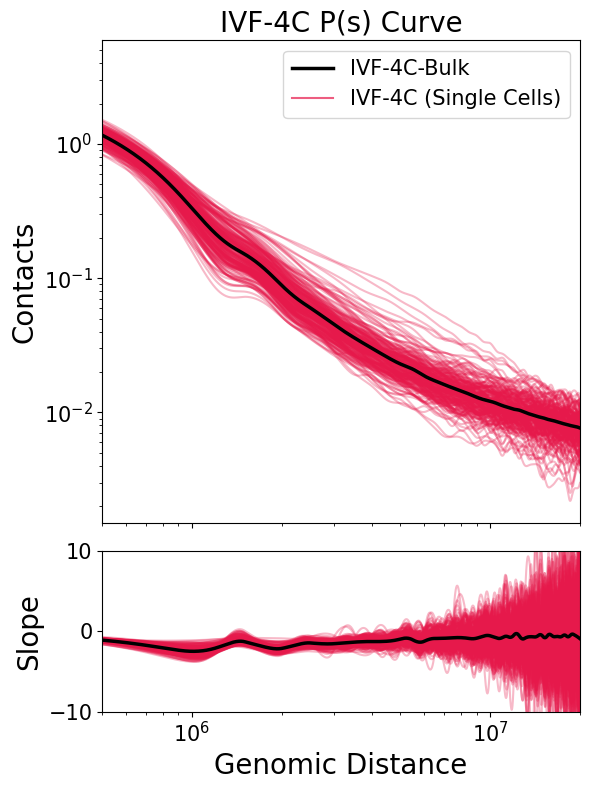

In [20]:
#IVF 4C bulk vs single cell
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# 读取数据
data = pd.read_csv('IVF_350_Ps_curve.txt', sep='\t')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 提取横坐标和数据
x = data.columns[1:].astype(int)
x_new = np.linspace(x.min(), x.max(), 5000)

# 只保留 IVF-4C 的数据
ivf_4c_data = data[data['ID'].astype(str).str.startswith('IVF-4')]

# 创建子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})

# 单细胞曲线（红线）
for index, row in ivf_4c_data.iterrows():
    curve_id = row['ID']
    if curve_id == 'IVF-4C-Bulk':
        continue  # 之后专门处理 Bulk 曲线
    y = row.values[1:].astype(float)

    if not np.isfinite(y).all():
        print(f"Invalid values in curve {curve_id}")
        continue

    try:
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_new)
        slope = np.gradient(np.log(y_smooth), np.log(x_new))

        ax1.plot(x_new, y_smooth, color='#e6194b', alpha=0.3)
        ax2.plot(x_new, slope, color='#e6194b', alpha=0.3)
    except Exception as e:
        print(f"Error in curve {curve_id}: {e}")

# Bulk 曲线（黑色加粗置顶）
bulk_row = ivf_4c_data[ivf_4c_data['ID'] == 'IVF-4C-Bulk']
if not bulk_row.empty:
    y_bulk = bulk_row.iloc[0].values[1:].astype(float)

    if np.isfinite(y_bulk).all():
        try:
            spl_bulk = make_interp_spline(x, y_bulk, k=3)
            y_bulk_smooth = spl_bulk(x_new)
            slope_bulk = np.gradient(np.log(y_bulk_smooth), np.log(x_new))

            ax1.plot(x_new, y_bulk_smooth, color='black', linewidth=2.5, label='IVF-4C-Bulk', zorder=10)
            ax2.plot(x_new, slope_bulk, color='black', linewidth=2.5, zorder=10)
        except Exception as e:
            print(f"Error in bulk curve: {e}")
    else:
        print("Bulk curve contains invalid values.")

# 添加图例
ax1.plot([], [], color='#e6194b', label='IVF-4C (Single Cells)', alpha=0.7)
ax1.legend(fontsize=15, loc='best')

# 设置坐标轴格式
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([500000, 20000000])
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylabel('Contacts', fontsize=20)
ax1.set_title('IVF-4C P(s) Curve', fontsize=20)

ax2.set_xscale('log')
ax2.set_xlim([500000, 20000000])
ax2.set_ylim([-10, 10])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Genomic Distance', fontsize=20)
ax2.set_ylabel('Slope', fontsize=20)

plt.tight_layout()
plt.savefig('IVF_4C_ps_curves_and_slopes.svg', dpi=300, bbox_inches='tight', transparent=True)


/tmp/ipykernel_1107437/2562566945.py:60: RuntimeWarning: divide by zero encountered in log
  slope = np.gradient(np.log(y_smooth), np.log(x_new))
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))


Error: Curve IVF-1C-90 contains invalid values (NaN or Inf).


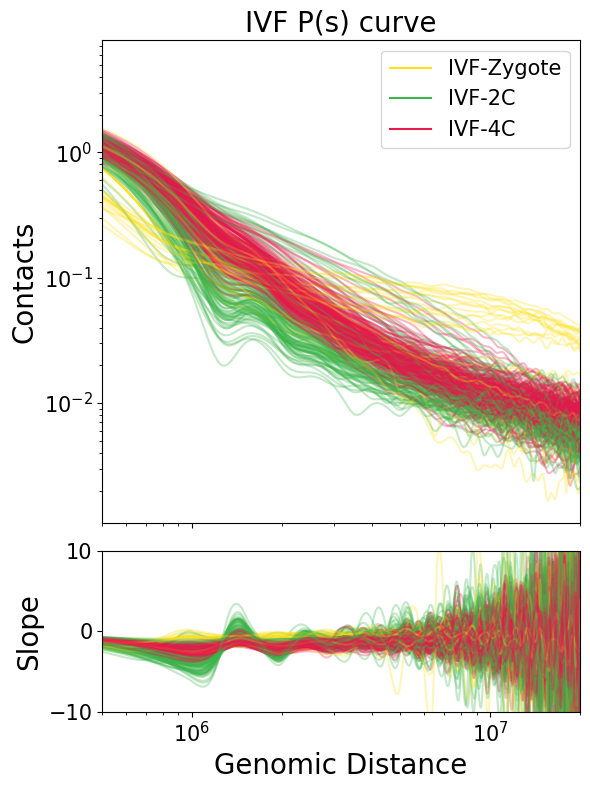

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
from IPython.display import SVG, display

# 读取数据
data = pd.read_csv('IVF_350_Ps_curve.txt', sep='\t')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 提取横坐标和数据
x = data.columns[1:].astype(int)  # 第一行是横坐标位置

# 创建新的 x 轴点用于平滑
x_new = np.linspace(x.min(), x.max(), 5000)  # 生成更多的 x 点进行平滑

# 提取前 20 行数据
selected_data = data.head(349)

# 创建子图 1 和子图 2，设置子图高度比例
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})

# 初始化图例标志
legend_added = {"IVF-Zygote": False, "IVF-2C": False, "IVF-4C": False}
handles, labels = [], []  # 用来存储图例的句柄和标签

# 循环处理每行数据
for i, (index, row) in enumerate(selected_data.iterrows()):
    curve_id = row['ID']  # 获取 ID
    y = row.values[1:].astype(float)  # 获取曲线数据并确保为浮动类型

    # 检查数据是否包含无效值
    if not np.isfinite(y).all():
        print(f"Error: Curve {curve_id} contains invalid values (NaN or Inf).")
        continue

    # 确定颜色和图例标签
    if curve_id.startswith("IVF-1C"):
        color = '#ffe119'  # 黄色
        label = "IVF-Zygote"
    elif curve_id.startswith("IVF-2-"):
        color = '#3cb44b'  # 绿色
        label = "IVF-2C"
    elif curve_id.startswith("IVF-4-"):
        color = '#e6194b'  # 红色
        label = "IVF-4C"
    else:
        color = '#000000'  # 默认黑色，用于未匹配的情况
        label = None  # 未匹配的情况不需要图例

    try:
        # 平滑处理
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_new)

        # 计算斜率 (dy/dx) 在对数空间中
        slope = np.gradient(np.log(y_smooth), np.log(x_new))

        # 绘制曲线
        if label and not legend_added[label]:
            # 仅在未添加图例时绘制图例
            ax1.plot(x_new, y_smooth, label=label, color=color, alpha=0.7)
            ax2.plot(x_new, slope, label=label, color=color, alpha=0.7)
            legend_added[label] = True
        else:
            # 不需要图例的曲线
            ax1.plot(x_new, y_smooth, color=color, alpha=0.3)
            ax2.plot(x_new, slope, color=color, alpha=0.3)

        # 存储handles和labels
        if label and label not in labels:
            handles.append(ax1.plot(x_new, y_smooth, color=color)[0])  # 仅存储句柄
            labels.append(label)  # 存储标签

    except Exception as e:
        print(f"Error: Curve {curve_id} caused an exception: {e}")

# 按照期望的顺序重新排列handles和labels
desired_order = ["IVF-Zygote", "IVF-2C", "IVF-4C"]
ordered_handles = [handles[labels.index(label)] for label in desired_order]
ordered_labels = [label for label in desired_order]

# 设置子图 1 为对数坐标
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([500000, 20000000])
ax1.set_xticklabels([])  # 隐藏 x 轴刻度标签
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylabel('Contacts', fontsize=20)
ax1.set_title('IVF P(s) curve', fontsize=20)
ax1.legend(handles=ordered_handles, labels=ordered_labels, fontsize=15, loc='best')  # 使用指定的顺序

# 设置子图 2 为对数坐标
ax2.set_xscale('log')
ax2.set_xlim([500000, 20000000])
ax2.set_ylim([-10, 10])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Genomic Distance', fontsize=20)
ax2.set_ylabel('Slope', fontsize=20)

# 调整子图间距
plt.tight_layout()
plt.savefig('IVF_350_ps_curves_and_slopes.svg', dpi=300, bbox_inches='tight', transparent=True)
#display(SVG(filename='IVF_350_ps_curves_and_slopes.svg'))

/tmp/ipykernel_1107437/3984407187.py:38: RuntimeWarning: divide by zero encountered in log
  slope = np.gradient(np.log(y_smooth), np.log(x_new))
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/tmp/ipykernel_1107437/3984407187.py:54: RuntimeWarning: divide by zero encountered in log
  slope_bulk = np.gradient(np.log(y_bulk_smooth), np.log(x_new))


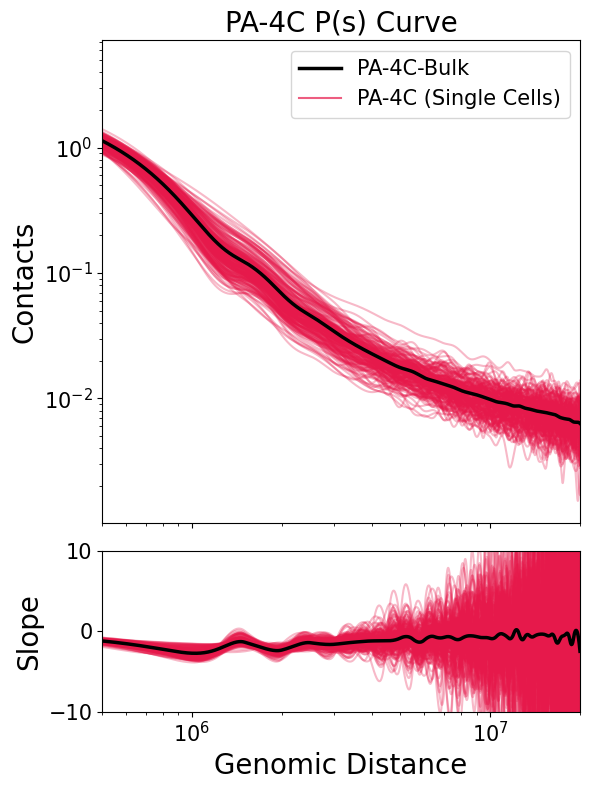

In [25]:
#PA 4C bulk vs single cell
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# 读取数据
data = pd.read_csv('PA_334_Ps_curve.txt', sep='\t')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 提取横坐标和数据
x = data.columns[1:].astype(int)
x_new = np.linspace(x.min(), x.max(), 5000)

# 只保留 IVF-4C 的数据
ivf_4c_data = data[data['ID'].astype(str).str.startswith('PA-4')]

# 创建子图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})

# 单细胞曲线（红线）
for index, row in ivf_4c_data.iterrows():
    curve_id = row['ID']
    if curve_id == 'PA-4C-Bulk':
        continue  # 之后专门处理 Bulk 曲线
    y = row.values[1:].astype(float)

    if not np.isfinite(y).all():
        print(f"Invalid values in curve {curve_id}")
        continue

    try:
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_new)
        slope = np.gradient(np.log(y_smooth), np.log(x_new))

        ax1.plot(x_new, y_smooth, color='#e6194b', alpha=0.3)
        ax2.plot(x_new, slope, color='#e6194b', alpha=0.3)
    except Exception as e:
        print(f"Error in curve {curve_id}: {e}")

# Bulk 曲线（黑色加粗置顶）
bulk_row = ivf_4c_data[ivf_4c_data['ID'] == 'PA-4C-Bulk']
if not bulk_row.empty:
    y_bulk = bulk_row.iloc[0].values[1:].astype(float)

    if np.isfinite(y_bulk).all():
        try:
            spl_bulk = make_interp_spline(x, y_bulk, k=3)
            y_bulk_smooth = spl_bulk(x_new)
            slope_bulk = np.gradient(np.log(y_bulk_smooth), np.log(x_new))

            ax1.plot(x_new, y_bulk_smooth, color='black', linewidth=2.5, label='PA-4C-Bulk', zorder=10)
            ax2.plot(x_new, slope_bulk, color='black', linewidth=2.5, zorder=10)
        except Exception as e:
            print(f"Error in bulk curve: {e}")
    else:
        print("Bulk curve contains invalid values.")

# 添加图例
ax1.plot([], [], color='#e6194b', label='PA-4C (Single Cells)', alpha=0.7)
ax1.legend(fontsize=15, loc='best')

# 设置坐标轴格式
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([500000, 20000000])
ax1.set_xticklabels([])
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylabel('Contacts', fontsize=20)
ax1.set_title('PA-4C P(s) Curve', fontsize=20)

ax2.set_xscale('log')
ax2.set_xlim([500000, 20000000])
ax2.set_ylim([-10, 10])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Genomic Distance', fontsize=20)
ax2.set_ylabel('Slope', fontsize=20)

plt.tight_layout()
plt.savefig('PA_4C_ps_curves_and_slopes.svg', dpi=300, bbox_inches='tight', transparent=True)


/tmp/ipykernel_1107437/2403756773.py:60: RuntimeWarning: divide by zero encountered in log
  slope = np.gradient(np.log(y_smooth), np.log(x_new))
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))


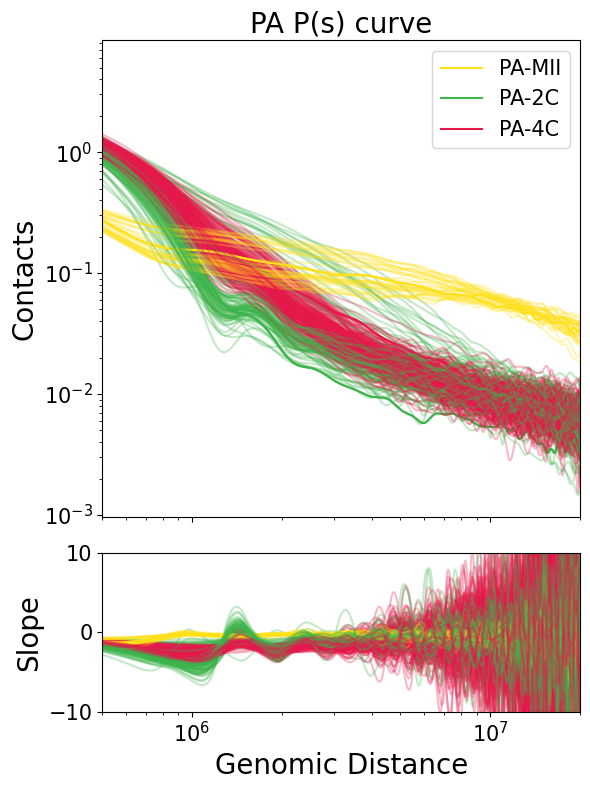

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
from IPython.display import SVG, display

# 读取数据
data = pd.read_csv('PA_334_Ps_curve.txt', sep='\t')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams['svg.hashsalt'] = 'hello'

# 提取横坐标和数据
x = data.columns[1:].astype(int)  # 第一行是横坐标位置

# 创建新的 x 轴点用于平滑
x_new = np.linspace(x.min(), x.max(), 5000)  # 生成更多的 x 点进行平滑

# 提取前 20 行数据
selected_data = data.head(355)

# 创建子图 1 和子图 2，设置子图高度比例
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})

# 初始化图例标志
legend_added = {"PA-MII": False, "PA-2C": False, "PA-4C": False}
handles, labels = [], []  # 用来存储图例的句柄和标签

# 循环处理每行数据
for i, (index, row) in enumerate(selected_data.iterrows()):
    curve_id = row['ID']  # 获取 ID
    y = row.values[1:].astype(float)  # 获取曲线数据并确保为浮动类型

    # 检查数据是否包含无效值
    if not np.isfinite(y).all():
        print(f"Error: Curve {curve_id} contains invalid values (NaN or Inf).")
        continue

    # 确定颜色和图例标签
    if curve_id.startswith("PA-MII"):
        color = '#ffe119'  # 黄色
        label = "PA-MII"
    elif curve_id.startswith("PA-2C"):
        color = '#3cb44b'  # 绿色
        label = "PA-2C"
    elif curve_id.startswith("PA-4C"):
        color = '#e6194b'  # 红色
        label = "PA-4C"
    else:
        color = '#000000'  # 默认黑色，用于未匹配的情况
        label = None  # 未匹配的情况不需要图例

    try:
        # 平滑处理
        spl = make_interp_spline(x, y, k=3)
        y_smooth = spl(x_new)

        # 计算斜率 (dy/dx) 在对数空间中
        slope = np.gradient(np.log(y_smooth), np.log(x_new))

        # 绘制曲线
        if label and not legend_added[label]:
            # 仅在未添加图例时绘制图例
            ax1.plot(x_new, y_smooth, label=label, color=color, alpha=0.7)
            ax2.plot(x_new, slope, label=label, color=color, alpha=0.7)
            legend_added[label] = True
        else:
            # 不需要图例的曲线
            ax1.plot(x_new, y_smooth, color=color, alpha=0.3)
            ax2.plot(x_new, slope, color=color, alpha=0.3)

        # 存储handles和labels
        if label and label not in labels:
            handles.append(ax1.plot(x_new, y_smooth, color=color)[0])  # 仅存储句柄
            labels.append(label)  # 存储标签

    except Exception as e:
        print(f"Error: Curve {curve_id} caused an exception: {e}")

# 按照期望的顺序重新排列handles和labels
desired_order = ["PA-MII", "PA-2C", "PA-4C"]
ordered_handles = [handles[labels.index(label)] for label in desired_order]
ordered_labels = [label for label in desired_order]

# 设置子图 1 为对数坐标
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim([500000, 20000000])
ax1.set_xticklabels([])  # 隐藏 x 轴刻度标签
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.set_ylabel('Contacts', fontsize=20)
ax1.set_title('PA P(s) curve', fontsize=20)
ax1.legend(handles=ordered_handles, labels=ordered_labels, fontsize=15, loc='best')  # 使用指定的顺序

# 设置子图 2 为对数坐标
ax2.set_xscale('log')
ax2.set_xlim([500000, 20000000])
ax2.set_ylim([-10, 10])
ax2.tick_params(axis='both', which='major', labelsize=15)
ax2.set_xlabel('Genomic Distance', fontsize=20)
ax2.set_ylabel('Slope', fontsize=20)

# 调整子图间距
plt.tight_layout()
plt.savefig('PA_334_ps_curves_and_slopes.svg', dpi=300, bbox_inches='tight', transparent=True)


In [5]:
#小鼠胚胎各个时期也存在这个wave
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# 读取数据
data = pd.read_csv('mouse_ps_curve_3.txt', sep='\t')

# 提取横坐标和数据
x = data.columns[1:].astype(int)  # 第一行是横坐标位置
x_new = np.linspace(x.min(), x.max(), 5000)  # 用于平滑处理

# 提取前 355 行数据
selected_data = data.head(644)

# 定义细胞类型和颜色
cell_types = ["1CSE", "2CSE", "4CSE", "8CSE", "64CSE"]
color_map = {
    "1CSE": '#ffe119',  # 黄色
    "2CSE": '#3cb44b',  # 绿色
    "4CSE": '#e6194b',  # 红色
    "8CSE": '#4363d8',  # 蓝色
    "64CSE": '#f58231'  # 橙色
}

# 分组处理数据
for cell_type in cell_types:
    # 筛选属于当前细胞类型的数据
    filtered_data = selected_data[selected_data['ID'].str.contains(cell_type)]
    
    if filtered_data.empty:
        print(f"No data found for cell type: {cell_type}")
        continue
    
    # 创建绘图
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    # 绘制当前组数据
    for i, (index, row) in enumerate(filtered_data.iterrows()):
        curve_id = row['ID']
        y = row.values[1:].astype(float)
        
        if not np.isfinite(y).all():
            print(f"Error: Curve {curve_id} contains invalid values.")
            continue
        
        # 确定颜色和图例
        color = color_map[cell_type]
        
        try:
            # 平滑数据并计算斜率
            spl = make_interp_spline(x, y, k=3)
            y_smooth = spl(x_new)
            slope = np.gradient(np.log(y_smooth), np.log(x_new))
            
            # 绘制曲线
            ax1.plot(x_new, y_smooth, color=color, alpha=0.3)
            ax2.plot(x_new, slope, color=color, alpha=0.3)
        
        except Exception as e:
            print(f"Error: Curve {curve_id} caused an exception: {e}")
    
    # 设置子图 1 样式
    ax1.set_xscale('log')
    ax1.set_yscale('log')
    ax1.set_xlim([500000, 20000000])
    ax1.set_xticklabels([])
    ax1.tick_params(axis='both', which='major', labelsize=15)
    ax1.set_ylabel('Contacts', fontsize=20)
    ax1.set_title(f'{cell_type} P(s) curve', fontsize=20)
    ax1.legend([cell_type], fontsize=15, loc='best')  # 直接使用当前类型的图例
    
    # 设置子图 2 样式
    ax2.set_xscale('log')
    ax2.set_xlim([500000, 20000000])
    ax2.set_ylim([-10, 10])
    ax2.tick_params(axis='both', which='major', labelsize=15)
    ax2.set_xlabel('Genomic Distance', fontsize=20)
    ax2.set_ylabel('Slope', fontsize=20)
    
    # 调整布局和保存
    plt.tight_layout()
    plt.savefig(f'{cell_type}_ps_curves_and_slopes.pdf', format='pdf')
    plt.close()


/tmp/ipykernel_2968370/1489217339.py:54: RuntimeWarning: divide by zero encountered in log
  slope = np.gradient(np.log(y_smooth), np.log(x_new))
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
  c = dx1 / (dx2 * (dx1 + dx2))
/tmp/ipykernel_2968370/1489217339.py:54: RuntimeWarning: divide by zero encountered in log
  slope = np.gradient(np.log(y_smooth), np.log(x_new))
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1241: RuntimeWarning: invalid value encountered in divide
  b = (dx2 - dx1) / (dx1 * dx2)
/home/lihaoxing/miniconda3/envs/jupyter/lib/python3.9/site-packages/numpy/lib/function_base.py:1242: RuntimeWarning: invalid value encountered in divide
